In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('weight_height.csv')
df.head()

,Weight,Height
0,45,161
1,47,162
2,49,166
3,51,171
4,54,168


Text(0, 0.5, 'Height')

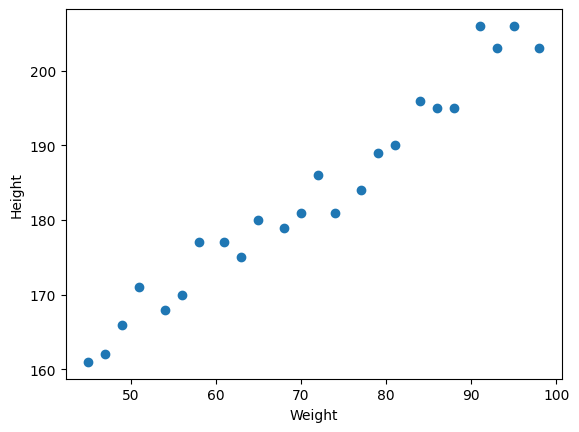

In [3]:
# Scatter PLot
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [4]:
# Correlation   
df.corr()

,Weight,Height
Weight,1.000000,0.979983
Height,0.979983,1.000000


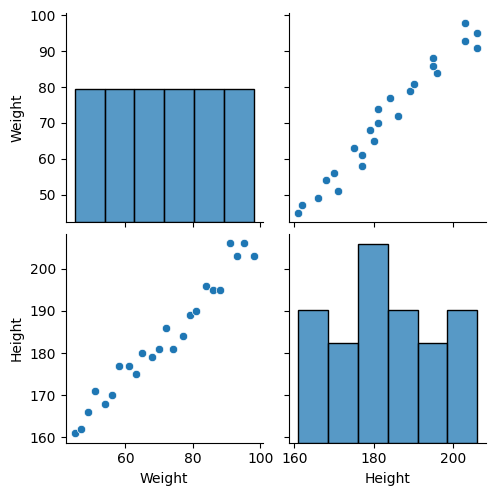

In [5]:
# Seaborn for visualization
sns.pairplot(df)

In [6]:
# Independent and Dependent features
X=df[['Weight']] # independent feature must be a dataframe or a 2D array
y=df['Height'] # dependent feature must be a series or a 1D array
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
X

,Weight
0,45
1,47
2,49
3,51
4,54
5,56
6,58
7,61
8,63
9,65


In [8]:
y

0     161
1     162
2     166
3     171
4     168
5     170
6     177
7     177
8     175
9     180
10    179
11    181
12    186
13    181
14    184
15    189
16    190
17    196
18    195
19    195
20    206
21    203
22    206
23    203
Name: Height, dtype: int64

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train.shape

(18, 1)

In [11]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # initialising the object
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.12342044],
       [-1.49772377],
       [ 1.26422563],
       [-0.95734236],
       [-1.37763901],
       [ 0.00333569],
       [ 0.42363233],
       [-1.25755425],
       [-1.07742712],
       [ 1.38431039],
       [ 0.72384423],
       [ 1.14414087],
       [ 1.56443752],
       [-0.65713047],
       [-0.23683383],
       [ 0.30354758],
       [ 0.96401374],
       [-0.83725761]])

In [12]:
X_test=scaler.transform(X_test)
X_test

array([[-0.53704572],
       [ 0.54371709],
       [-1.61780852],
       [ 0.84392898],
       [-0.11674907],
       [-0.41696096]])

- we standardize only the independent/input feature(s)
- we use fit_transform only in case of X_train and use transform in case of X_test.
- In case of fit_transform, it calculates mean and standard deviation of the X_train and applies Z score formula on it to standardize it
- In case of transform, it just applies the z score to standardize it using the mean and standard deviation value of X_train

In [13]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [14]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [15]:
print("Coefficient or slope:",regression.coef_) # only one slope as there is only one input feature
print("Intercept:",regression.intercept_)

Coefficient or slope: [13.71097356]
Intercept: 184.38888888888889


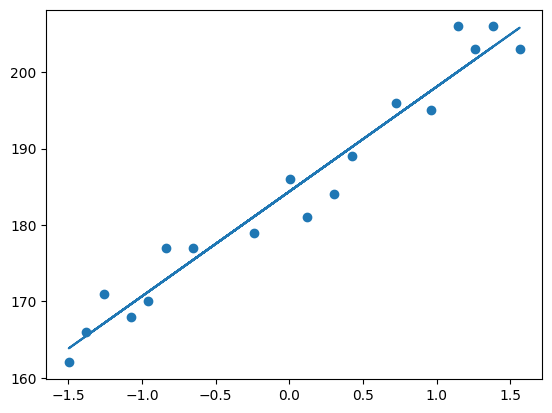

In [16]:
# plotting training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [17]:
# prediction for test data
y_pred=regression.predict(X_test)
y_pred

array([177.02546927, 191.84377956, 162.20715899, 195.95997686,
       182.78814549, 178.67194819])

In [18]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [19]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.4736705216410892
1.5254303294649105
1.5727906795378364


In [20]:
# R-squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9791349253094941

In [21]:
# Adjusted R-squared
1 - ((1-score)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)

0.9739186566368676

# OLS LINEAR REGRESSION

In [22]:
import statsmodels.api as sm

In [23]:
model=sm.OLS(y_train,X_train).fit()

In [24]:
prediction=model.predict(X_test)
print(prediction)

[ -7.36341962   7.45489067 -22.1817299   11.57108797  -1.60074339
  -5.7169407 ]


In [25]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.053
Method:                 Least Squares   F-statistic:                            0.09397
Date:                Fri, 16 May 2025   Prob (F-statistic):                       0.763
Time:                        11:22:43   Log-Likelihood:                         -119.45
No. Observations:                  18   AIC:                                      240.9
Df Residuals:                      17   BIC:                                      241.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\KIIT0001\Desktop\DESKTOP_OWN\CODING\venv\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [28]:
# Prediction for new data
regression.predict(scaler.transform([[59]]))
# regression.predict() will only accept 2D parameters
# Hence, X_train or X_test is only passed

c:\Users\KIIT0001\Desktop\DESKTOP_OWN\CODING\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([173.73251143])